<a href="https://colab.research.google.com/github/omeromergiladi/machine_learning/blob/main/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATSET DESCRIPTION**

The dataset contain 3 classes of 50 instances each, where each class refers to a type of iris plant.
One class is linearly separable from the 2 others, the latter are not linearlly separable from each other.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class- Iris-Setosa, Iris Versicolour, Iris Virginica


In [6]:
#Import modules

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import datasets

warnings.filterwarnings('ignore')

**Loading the Data Set**

In [9]:
iris = datasets.load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


**Display statistics about the data**


In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [14]:
#check for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

**Exploratory data analysis**

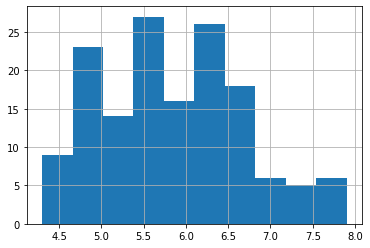

In [15]:
df['sepal length (cm)'].hist()

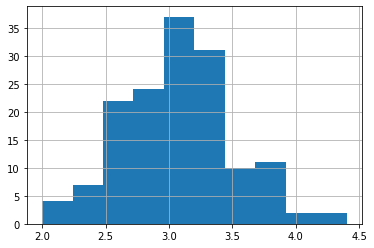

In [16]:
df['sepal width (cm)'].hist()

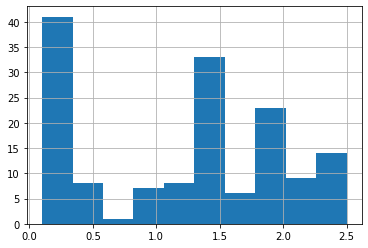

In [17]:
df['petal width (cm)'].hist()

In [18]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


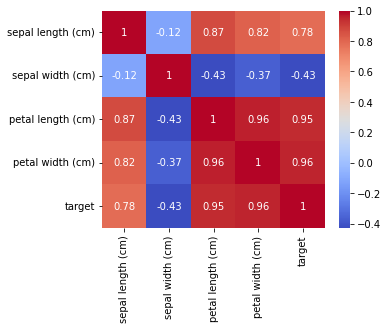

In [19]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

**Label Encoder**

In machine learning, we usually deal with datasets wich contain multiple labels in one or more than one column. These labels can be in the dorm of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df['target'] = le.fit_transform(df['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Model Training**

In [23]:
from sklearn.model_selection import train_test_split

#train - 70
#test - 30

X = df.drop(columns=['target'])
Y = df['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [30]:
#logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [25]:
#model training
model.fit(x_train, y_train)

LogisticRegression()

In [26]:
#print metric to get performance
print("Accuracy:", model.score(x_test, y_test) * 100)

Accuracy: 97.77777777777777


In [27]:
#knn- k- nearest neighbours

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [28]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
#print metric to get the performance
print("Accuracy:", model.score(x_test, y_test) * 100)

Accuracy: 95.55555555555556


In [31]:
#decision tree

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [32]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
#print metric to get performance

print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 93.33333333333333


**Summary**

I have tried 3 different algorithms on this data set and got high accuracy in all of them where the highest score in Logistic Regression.